<a href="https://colab.research.google.com/github/kuntal99chakraborty-ops/Python-Basic-Assignment/blob/main/Question_10_HR_Analytics_Dataset_a)_What_factors_most_strongly_correlate_with_employee_attrition%3F_Use_visualizations_to_show_key_drivers_(e_g_%2C_satisfaction%2C_overtime%2C_salary)_b)_Are_employees_with_more_projects_more_likely_to_leave%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (14999, 10)
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



Attrition distribution (left = 1):
left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

Correlation with attrition (left):
satisfaction_level     -0.388375
salary_code            -0.157898
last_evaluation         0.006567
number_project          0.023787
average_montly_hours    0.071287
time_spend_company      0.144822
left                    1.000000
Name: left, dtype: float64


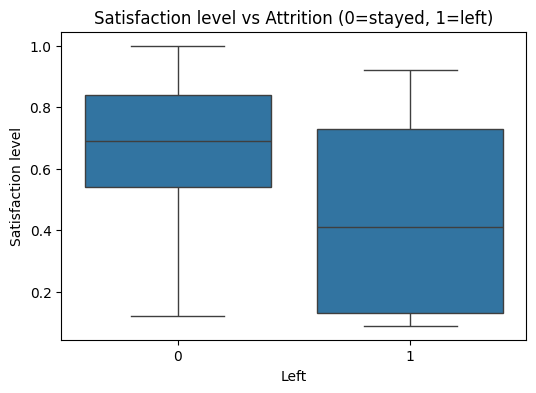

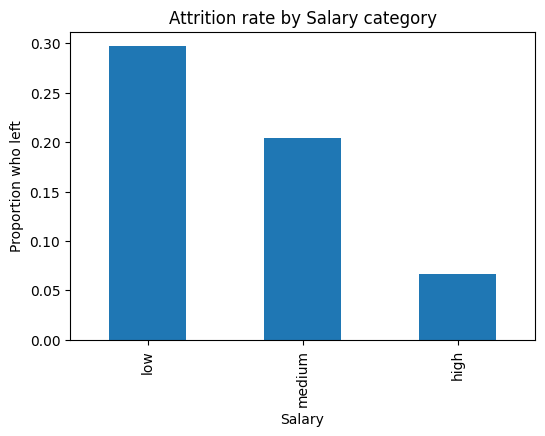

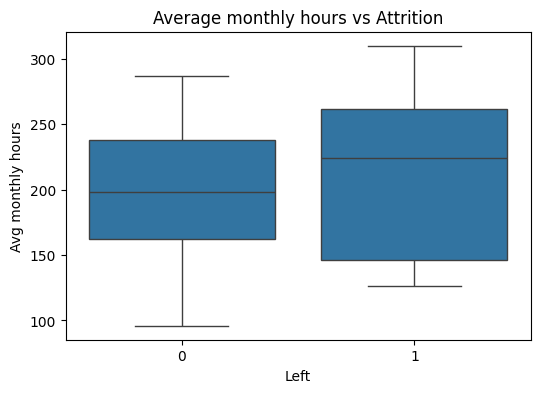

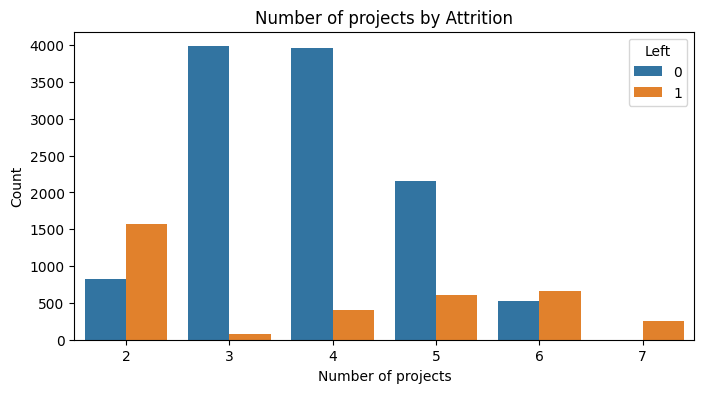


Attrition rate by number_of_projects:
                count  attrition_rate
number_project                       
2                2388        0.656198
3                4055        0.017756
4                4365        0.093700
5                2761        0.221659
6                1174        0.557922
7                 256        1.000000

Logistic regression coefficients (sorted):
satisfaction_level     -1.033730
salary_code            -0.447094
number_project         -0.379904
last_evaluation         0.121405
average_montly_hours    0.222630
time_spend_company      0.338693
dtype: float64

Train accuracy: 0.7713574539959107
Test accuracy: 0.768


In [1]:
# hr_attrition_analysis.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ---------- 1. Load dataset ----------
hr_analytics.csv
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
print(df.dtypes)
display(df.head())

# ---------- 2. Prepare data ----------
# encode salary
df['salary_code'] = df['salary'].map({'low':1,'medium':2,'high':3})

# quick target check
print("\nAttrition distribution (left = 1):")
print(df['left'].value_counts(normalize=True))

# ---------- 3. Correlation with attrition ----------
corr_vars = ['satisfaction_level','average_montly_hours','number_project',
             'time_spend_company','salary_code','last_evaluation']
corr_with_left = df[corr_vars + ['left']].corr()['left'].sort_values()
print("\nCorrelation with attrition (left):")
print(corr_with_left)

# ---------- 4. Visualizations ----------
plt.style.use('default')  # don't set custom colors
# 4.1 Satisfaction vs Attrition (boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title("Satisfaction level vs Attrition (0=stayed, 1=left)")
plt.xlabel("Left")
plt.ylabel("Satisfaction level")
plt.show()

# 4.2 Attrition rate by salary category (bar)
salary_rates = df.groupby('salary')['left'].mean().reindex(['low','medium','high'])
plt.figure(figsize=(6,4))
salary_rates.plot(kind='bar')
plt.title("Attrition rate by Salary category")
plt.ylabel("Proportion who left")
plt.xlabel("Salary")
plt.show()

# 4.3 Average monthly hours (overtime proxy) vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='left', y='average_montly_hours', data=df)
plt.title("Average monthly hours vs Attrition")
plt.xlabel("Left")
plt.ylabel("Avg monthly hours")
plt.show()

# 4.4 Number of projects: counts split by left
plt.figure(figsize=(8,4))
sns.countplot(x='number_project', hue='left', data=df)
plt.title("Number of projects by Attrition")
plt.xlabel("Number of projects")
plt.ylabel("Count")
plt.legend(title='Left')
plt.show()

# 4.5 Attrition rate by number_project (table)
proj_rates = df.groupby('number_project')['left'].agg(['count','mean']).rename(columns={'mean':'attrition_rate'})
print("\nAttrition rate by number_of_projects:")
print(proj_rates)

# ---------- 5. Logistic regression (multivariate effect) ----------
X = df[['satisfaction_level','average_montly_hours','number_project','time_spend_company','salary_code','last_evaluation']]
y = df['left']

# Standardize numeric features for good coefficient scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coefs = pd.Series(model.coef_[0], index=X.columns).sort_values()
print("\nLogistic regression coefficients (sorted):")
print(coefs)

# show performance
print("\nTrain accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))
